# Model Project

**Table of contents**<a id='toc0_'></a>  
- [1. Objective](#toc1_)
- [2. Import of packages](#toc2_)
- [3. Model description](#toc3_)
- [4. Analytical solution](#toc4_)
- [5. Numerical solution](#toc5_)
- [6. Further analysis](#toc6_)
- [7. Concluding remarks](#toc7_)

## 1. <a id='toc1_'></a>[Objectives](#toc1_)

This notebook examines the OLG model, and look at how population growth affects the outcome of the model.

## 2. <a id='toc2_'></a>[Import of packages](#toc2_)

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace

%load_ext autoreload
%autoreload 2

import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

## 3. <a id='toc3_'></a>[Model description](#toc3_)

## The OLG Model 

The OLG model consists of 2 periods and 2 groups, young and old. The production function is a standard Cobb-Douglas function:
$$
Y_{t}=AK_{t}^{\alpha}L_{t}^{1-\alpha}
$$
with $t=1,2,...,\infty$ and $1>\alpha>0$. $K$ is capital and $L$ is the labor force which consists entirely of the young population. 
\
\
Capital accumulation is equal to how much is being saved in the economy. Note that it is only the young people who save:
$$
K_{t+1}=s_{t}L_{t}
$$
for simplicity, we assume that capital does not depreciate, $\delta=0$.
\
\
$L_{t}$ is the number of people born in period $t$, which grow at the constant rate, $n$:
$$
L_{t+1}=L_{t}(1+n)
$$


The firms have the profit maximization problem: 
$$
\underset{K_{t}L_{t}}{max}\quad AK_{t}^{\alpha}L_{t}^{1-\alpha}-r_{t}K_{t}-w_{t}L_{t}
$$
with $r_{t}$ and $w_{t}$ being the factor prices. We now that the standard solutions for factor prices in a Cobb-Douglas production function:
$$
r_{t}=A\alpha k_{t}^{\alpha-1}
$$
$$
w_{t}=A(1-\alpha)k_{t}^{\alpha}
$$
with A being the factor productivity, $A>0$. $k_t$ is capital per capita, $k_{t}=\frac{K_{t}}{L_{t}}$


The agents in the economy get utility from consuming:
$$
U_{t}=ln(c_{1t})+\beta ln(c_{2t+1})
$$
with $c_{1t}$ being consumption when young, and $c_{2t+1}$ when old. $\beta=\frac{1}{1+\rho}$, with $\rho$ being the discount rate, $\rho>-1$, ensuring the parameter $\beta$ is positive.

The agents have budget constraints,
$$
c_{1t}+s_{t}=w_{t}
$$
$$
c_{2t+1}=(1+r_{t+1})s_{t}
$$
The young agents consume their wages minus what they save, while the old consume their savings with interests. This yield the lifetime budget constraint, 
$$
c_{1t}+\frac{c_{2t+1}}{1+r_{t+1}}=w_{t}
$$

The basics of the model is now in place. Next step is to solve the household maximization problem:
$$
\underset{c_{1t},c_{2t+1}}{max}\quad ln(c_{1t})+\beta ln(c_{2t+1}) \quad s.t. \quad c_{1t}+\frac{c_{2t+1}}{1+r_{t+1}}=w_{t}
$$
The problem is solved with Lagrange and yields the Euler-equation:
$$
c_{2t+1}=\frac{1+r_{t+1}}{1+\rho}c_{1t}
$$

Combining the Euler-equation with the budget constraints, we obtain the optimal saving:
$$
s_{t}=\frac{1}{2+\rho}w_{t}
$$
Using that $s_{t}=k_{t+1}(1+n)$, we can find the capital accumulation per capita:
$$
k_{t+1}(1+n)=\frac{1}{2+\rho}w_{t}
$$
$$
\Leftrightarrow
$$
$$
k_{t+1}=\frac{A(1-\alpha)k_{t}^{\alpha}}{(1+n)(2+\rho)}
$$

In steady state we have that, $k_{t+1}=k_{t}=k^{*}$:
$$
k^{*}=(\frac{A(1-\alpha)}{(1+n)(2+\rho)})^{\frac{1}{1-\alpha}}
$$

## 4. <a id='toc4_'></a>[Analytical solution](#toc4_)

In this part we will set up the relevant parameters (sm.symbols), solve for steady state(sm.solve), and turn our function into a Python-function (sm.lambdify)

In [2]:
alpha = sm.symbols('alpha')
rho =  sm.symbols('rho')
k = sm.symbols('k')
n = sm.symbols('n')
A = sm.symbols('A')

In [3]:
ss = sm.Eq(k, (A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))
ss

Eq(k, A*k**alpha*(1 - alpha)/((n + 1)*(rho + 2)))

In [4]:
ss_solve = sm.solve(ss, k)[0]
ss_solve

(A*(1 - alpha)/(n*rho + 2*n + rho + 2))**(-1/(alpha - 1))

which is equivalent to the steady state derived in part 3.

In [5]:
k_solve = sm.lambdify((alpha,rho,n,A),ss_solve)
k_solve(1/3,0.05,0.04,1)

0.17485671329443958

With our analytical solution, we get that capital per capita is 0.175 in steady state. 

## 5. <a id='toc5_'></a>[Numerical solution](#toc5_)

Next, we solve numerically. First, we define the values for our set of parameters used in the analysis.





In [6]:
# We define the values for our set of parameters
alpha = 1/3
rho = 0.05
n = 0.04
A = 1.00

tau = 0.00

ks_1 = ((A*(1-alpha))/((1+n)*(2+rho)))**(-1/(alpha-1))

In [7]:
# Defining the objective
obj = lambda k: k - ((A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))

# Optimizing the model and finding the roots
result = optimize.root_scalar(obj,bracket=[1e-10,10],method='bisect') 
result.root

0.17485671329430136

## 6. <a id='toc6_'></a>[Further analysis](#toc6_)

### PAYG
We now want to introduce the Pay-as-you-go system to our model. In this system the government raises contributions, $d_{t}$ from current young, and pays them out to current old. 

$$
b_{t}=(1+n)d_{t}
$$
A fraction of the wage, $\tau$, is added to the contribution, $d_{t}=\tau w_{t}$.  
We now have the new budget constraints: 
$$
c_{1t}+s_{t}+d_{t}=w_{t}
$$
$$
c_{2t+1}=(1+r_{t+1})s_{t}+(1+n)d_{t+1}
$$

We now have a new expression for optimal saving:
$$
s_{t}=\frac{1}{2+\rho}[(w_{t}-d_{t})-\frac{1+\rho}{r_{t+1}}(1+n)d_{t+1}]
$$
We can now derive capital per capita: 
$$
k_{t+1}=\frac{1}{1+\frac{1+\rho}{2+\rho}\frac{1-\alpha}{\alpha}\tau}(\frac{1}{(1+n)(2+\rho)}(1-\tau)w_{t})
$$
Equal to its steady state, 
$$
k^{*}=\frac{1}{1+\frac{1+\rho}{2+\rho}\frac{1-\alpha}{\alpha}\tau}(\frac{1}{(1+n)(2+\rho)}(1-\tau)w_{t})

$$

In [15]:
def f(k, n, alpha, rho, tau, wt):
    numerator = (1 - tau) * wt / ((1 + n) * (2 + rho))
    denominator = 1 + ((1 + rho) / (2 + rho)) * ((1 - alpha) / alpha) * tau
    return k - numerator / denominator

# Setting n
ns = [0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]

wt = 1

# Creating an empty list to store the values of steady state
solution = []

# Creating a loop and optimizing using bisect method
for tau in ns: 
    f_a = lambda k: f(k, n, alpha, rho, tau, wt)
    res = optimize.root_scalar(f_a, bracket=[1e-10, 10], method='bisect') 
    solution.append(res.root)
    print(f'Tax set to {tau:} yields the new steady state level: {res.root :.3f}')

Tax set to 0.1 yields the new steady state level: 0.284
Tax set to 0.15 yields the new steady state level: 0.257
Tax set to 0.2 yields the new steady state level: 0.231
Tax set to 0.25 yields the new steady state level: 0.208
Tax set to 0.3 yields the new steady state level: 0.187
Tax set to 0.35 yields the new steady state level: 0.167
Tax set to 0.4 yields the new steady state level: 0.148
Tax set to 0.7 yields the new steady state level: 0.061


Clearly, as the tax level rises, the capital accumulation in steady state decreases. An illustration follows:

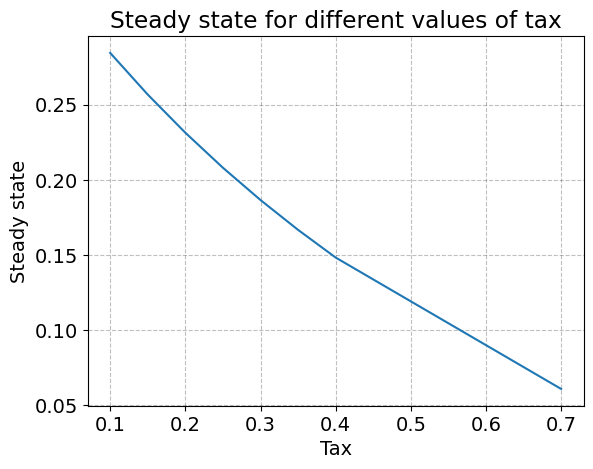

In [16]:
# Creating figure
def plot_n():
    fig = plt.figure()

    # Creating the plot
    ax = fig.add_subplot(1,1,1)

    ax.plot(ns, solution)

    # Add labels and title
    ax.set_title('Steady state for different values of tax')
    ax.set_xlabel('Tax')
    ax.set_ylabel('Steady state')

# Print
plot_n()

## 7. <a id='toc7_'></a>[Concluding remarks](#toc7_)